In [17]:
import numpy as np
import pandas as pd


path = 'data/'
#load all the data
test = pd.read_csv(path+'test.csv')
train = pd.read_csv(path+'train.csv')
vali = pd.read_csv(path+'validation.csv')

In [18]:
train.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [276]:
train['slotwidth'].value_counts()

300     705530
1000    606938
728     410218
336     257585
160     129767
250     124471
950     120558
960     111185
200      65953
320      54487
468      52483
120      29277
980       7328
180       6444
620       5643
360       4300
640       2948
910       1731
760        486
234        331
125         75
Name: slotwidth, dtype: int64

In [164]:
print(train["advertiser"][train["adexchange"] == '4'].value_counts())

2821    87521
Name: advertiser, dtype: int64


### weekday and hour CTR

In [36]:
#calculate basic CTR
basic_ctr = train['click'].value_counts(normalize = True)[1]

weekday_ctr = []
for i in range(7):
    weekday_ctr.append( train['click'][train['weekday']==i].value_counts(normalize = True)[1])

hour_ctr = []
for i in range(24):
    hour_ctr.append( train['click'][train['hour']==i].value_counts(normalize = True)[1])

In [3]:
import matplotlib.pyplot as plt

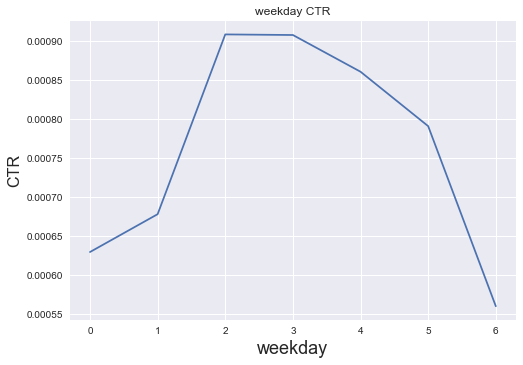

In [304]:
plt.plot(weekday_ctr)
plt.title('weekday CTR')
plt.xlabel('weekday', fontsize=18)
plt.ylabel('CTR', fontsize=16)
# fig.savefig('weekday_ctr.png')
plt.grid(True)
plt.show()

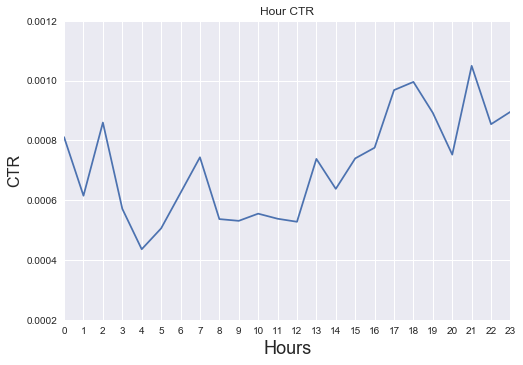

In [305]:
plt.plot(hour_ctr)
plt.axis([0, 23, 0.0002, 0.0012])
plt.xticks(np.arange(0, 24))
plt.grid(True)
plt.xlabel('Hours', fontsize=18)
plt.ylabel('CTR', fontsize=16)
# fig.savefig('hour_ctr.jpg')
plt.title('Hour CTR')
plt.show()

### OS CTR

In [307]:
useragent = train['useragent']

os = useragent.map(lambda x: x.split('_')[0]).value_counts()


In [308]:
type(useragent.map(lambda x: x.split('_')[0]).value_counts())

pandas.core.series.Series

In [309]:
os = os.tolist()

In [310]:
os_name = ['windows','android','mac','other','linux','ios']

In [311]:
os_ctr = []
for i in os_name:
    os_ctr.append(train['click'][train['useragent'].map(lambda x: x.split('_')[0])==i].value_counts(normalize = True)[1])
    

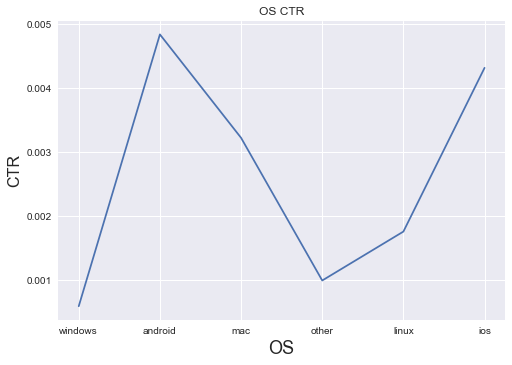

In [312]:
x = range(6)
y = os_ctr
plt.xticks(x, os_name)
plt.plot(x, y)
plt.title('OS CTR')
plt.xlabel('OS', fontsize=18)
plt.ylabel('CTR', fontsize=16)
# fig.savefig('os_ctr.jpg')
plt.grid(True)
plt.show()

### browser CTR 

In [313]:
useragent.map(lambda x: x.split('_')[1]).value_counts()

ie          1619690
chrome       888920
safari       111494
firefox       26048
other         25000
theworld      15305
maxthon        8146
opera          3102
sogou            33
Name: useragent, dtype: int64

In [314]:
browser_name = ['ie','chrome','safari','firefox','other','theworld','maxthon','opera','sogou']

In [315]:
browser = useragent.map(lambda x: x.split('_')[1]).value_counts().tolist()

In [316]:
browser_ctr = []
for i in browser_name:
    if len(train['click'][train['useragent'].map(lambda x: x.split('_')[1])==i].value_counts()) > 1:
        browser_ctr.append(train['click'][train['useragent'].map(lambda x: x.split('_')[1])==i].value_counts(normalize = True)[1])
    else:
        browser_ctr.append(0)

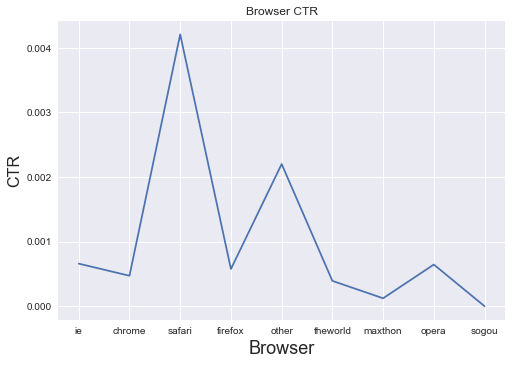

In [317]:
x = range(9)
y = browser_ctr
plt.xticks(x, browser_name)
plt.plot(x, y)
plt.title('Browser CTR')
plt.xlabel('Browser', fontsize=18)
plt.ylabel('CTR', fontsize=16)
# fig.savefig('browser_ctr.jpg')
plt.grid(True)
plt.show()

### Region CTR

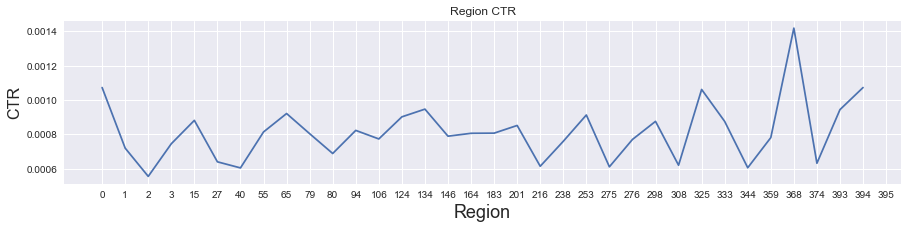

In [318]:
a = train['region'][train['click']==1].value_counts(sort=False)
c = train['region'].value_counts(sort=False)

region_ctr = (a/c).tolist()
plt.figure(figsize=(15,3))
y = region_ctr
x = range(len(region_ctr))
plt.xticks(x,np.sort(train['region'].unique()))
plt.plot(x,y)
plt.title('Region CTR')
plt.xlabel('Region', fontsize=18)
plt.ylabel('CTR', fontsize=16)
# fig.savefig('region_ctr.jpg')
plt.grid(True)
plt.show()